In [5]:
# Importing all required libraries upfront (as per your style)
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting visualizations
import seaborn as sns  # For enhanced visualizations
import os  # For handling file operations
from scipy import stats  # For statistical tests

In [7]:
# Setting up plotting style for professional visualizations
plt.style.use('ggplot')  # Using ggplot style as a valid alternative for clean plots
sns.set_palette('husl')  # Setting a visually appealing color palette

In [8]:
# Define output directory globally
output_dir = 'rainfall_eda_plots2'  # Define output directory name

# Step 1: Data Loading and Initial Exploration
# Ensuring output directory exists for saving plots and results
try:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Create directory if it doesn't exist
        print(f"Created directory: {output_dir}")  # Confirm directory creation
    else:
        print(f"Directory already exists: {output_dir}")  # Confirm directory exists
except PermissionError:
    print(f"Error: No permission to create directory '{output_dir}'. Please check your write permissions.")
    raise  # Stop execution if permission issue occurs
except Exception as e:
    print(f"Error creating directory '{output_dir}': {str(e)}")
    raise  # Stop execution for other errors

Created directory: rainfall_eda_plots2


In [22]:
# Loading the raw dataset
df = pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')  # Load raw CSV
print("\nInitial Dataset Info (Before Date Conversion):")
print(df.info())  # Display dataset structure and data types to check Date type


Initial Dataset Info (Before Date Conversion):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB
None


In [23]:
# Debug: Print first few Date values to identify format
print("\nFirst 5 Date values (as strings):")
print(df['Date'].head().tolist())  # Print raw Date values


First 5 Date values (as strings):
['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05']


In [24]:
# Converting Date column to datetime with explicit format (to be adjusted based on your data)
try:
    # Try common formats; adjust the format based on the printed Date values
    date_formats = ['%Y-%m-%d', '%d-%m-%Y', '%m/%d/%Y', '%d/%m/%Y']  # Add more if needed
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Initial attempt
    if df['Date'].isnull().all():
        for fmt in date_formats:
            df['Date'] = pd.to_datetime(df['Date'], format=fmt, errors='coerce')
            if not df['Date'].isnull().all():
                print(f"Successfully parsed Date with format: {fmt}")
                break
    if df['Date'].isnull().all():
        raise ValueError("Unable to parse Date column. Please check the date format in the dataset and adjust the 'date_formats' list.")
except Exception as e:
    print(f"Error converting Date column: {str(e)}")
    raise

In [25]:
print("\nInitial Dataset Info (After Date Conversion):")
print(df.info())  # Display updated dataset structure
print("\nFirst 5 Rows of the Dataset:")
print(df.head())  # Display first 5 rows
print("\nBasic Statistics of Numerical Columns:")
print(df.describe())  # Display summary statistics


Initial Dataset Info (After Date Conversion):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           73100 non-null  datetime64[ns]
 1   Location       73100 non-null  object        
 2   Temperature    73100 non-null  float64       
 3   Humidity       73100 non-null  float64       
 4   Wind Speed     73100 non-null  float64       
 5   Precipitation  73100 non-null  float64       
 6   Cloud Cover    73100 non-null  float64       
 7   Pressure       73100 non-null  float64       
 8   Rain Tomorrow  73100 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 5.0+ MB
None

First 5 Rows of the Dataset:
        Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0 2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1 2024-01-02  

In [26]:
# Saving initial exploration results to CSV
df.to_csv(os.path.join(output_dir, 'initial_exploration.csv'), index=False)  # Save raw data
print(f"Initial exploration data saved to '{os.path.join(output_dir, 'initial_exploration.csv')}'")

Initial exploration data saved to 'rainfall_eda_plots2\initial_exploration.csv'


In [10]:
# Step 2: Data Cleaning
# Checking for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())  # Display count of missing values per column

# Handling missing values (filling with median for numerical, mode for categorical)
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df[column].fillna(df[column].median(), inplace=True)  # Fill numerical with median
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)  # Fill categorical with mode

# Verifying no missing values remain
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())  # Confirm no missing values


Missing Values in Dataset:
Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

Missing Values After Cleaning:
Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64


C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_9912\3252851499.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)  # Fill categorical with mode
C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_9912\3252851499.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [11]:
# Saving cleaned dataset
df.to_csv(os.path.join(output_dir, 'cleaned_rain_prediction.csv'), index=False)  # Save cleaned data
print(f"Cleaned dataset saved to '{os.path.join(output_dir, 'cleaned_rain_prediction.csv')}'")

Cleaned dataset saved to 'rainfall_eda_plots2\cleaned_rain_prediction.csv'


In [50]:
# Checking for duplicate rows
print("\nNumber of Duplicate Rows:")  # Header for clarity
duplicate_count = df.duplicated().sum()  # Count duplicate rows
print(duplicate_count)  # Display duplicate count


Number of Duplicate Rows:
0


In [51]:
# Checking for invalid values in specific columns
invalid_temp = df[(df['Temperature'] < -30) | (df['Temperature'] > 120)]  # Unrealistic temperatures
invalid_humidity = df[(df['Humidity'] < 0) | (df['Humidity'] > 100)]  # Invalid humidity
invalid_wind_speed = df[df['Wind Speed'] < 0]  # Negative wind speed
invalid_precipitation = df[df['Precipitation'] < 0]  # Negative precipitation
invalid_cloud_cover = df[(df['Cloud Cover'] < 0) | (df['Cloud Cover'] > 100)]  # Invalid cloud cover
invalid_pressure = df[(df['Pressure'] < 900) | (df['Pressure'] > 1100)]  # Unrealistic pressure

In [52]:
print("\nInvalid Temperature Values (count):", len(invalid_temp))  # Count invalid temperatures
print("Invalid Humidity Values (count):", len(invalid_humidity))  # Count invalid humidity
print("Invalid Wind Speed Values (count):", len(invalid_wind_speed))  # Count invalid wind speed
print("Invalid Precipitation Values (count):", len(invalid_precipitation))  # Count invalid precipitation
print("Invalid Cloud Cover Values (count):", len(invalid_cloud_cover))  # Count invalid cloud cover
print("Invalid Pressure Values (count):", len(invalid_pressure))  # Count invalid pressure


Invalid Temperature Values (count): 0
Invalid Humidity Values (count): 0
Invalid Wind Speed Values (count): 0
Invalid Precipitation Values (count): 0
Invalid Cloud Cover Values (count): 0
Invalid Pressure Values (count): 0


In [53]:
# Checking unique values in categorical/binary columns
print("\nUnique Values in Location:", df['Location'].unique())  # Unique locations
print("Unique Values in Rain Tomorrow:", df['Rain Tomorrow'].unique())  # Unique values in target


Unique Values in Location: ['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix' 'Philadelphia'
 'San Antonio' 'San Diego' 'Dallas' 'San Jose' 'Austin' 'Jacksonville'
 'Fort Worth' 'Columbus' 'Indianapolis' 'Charlotte' 'San Francisco'
 'Seattle' 'Denver' 'Washington D.C.']
Unique Values in Rain Tomorrow: [0 1]


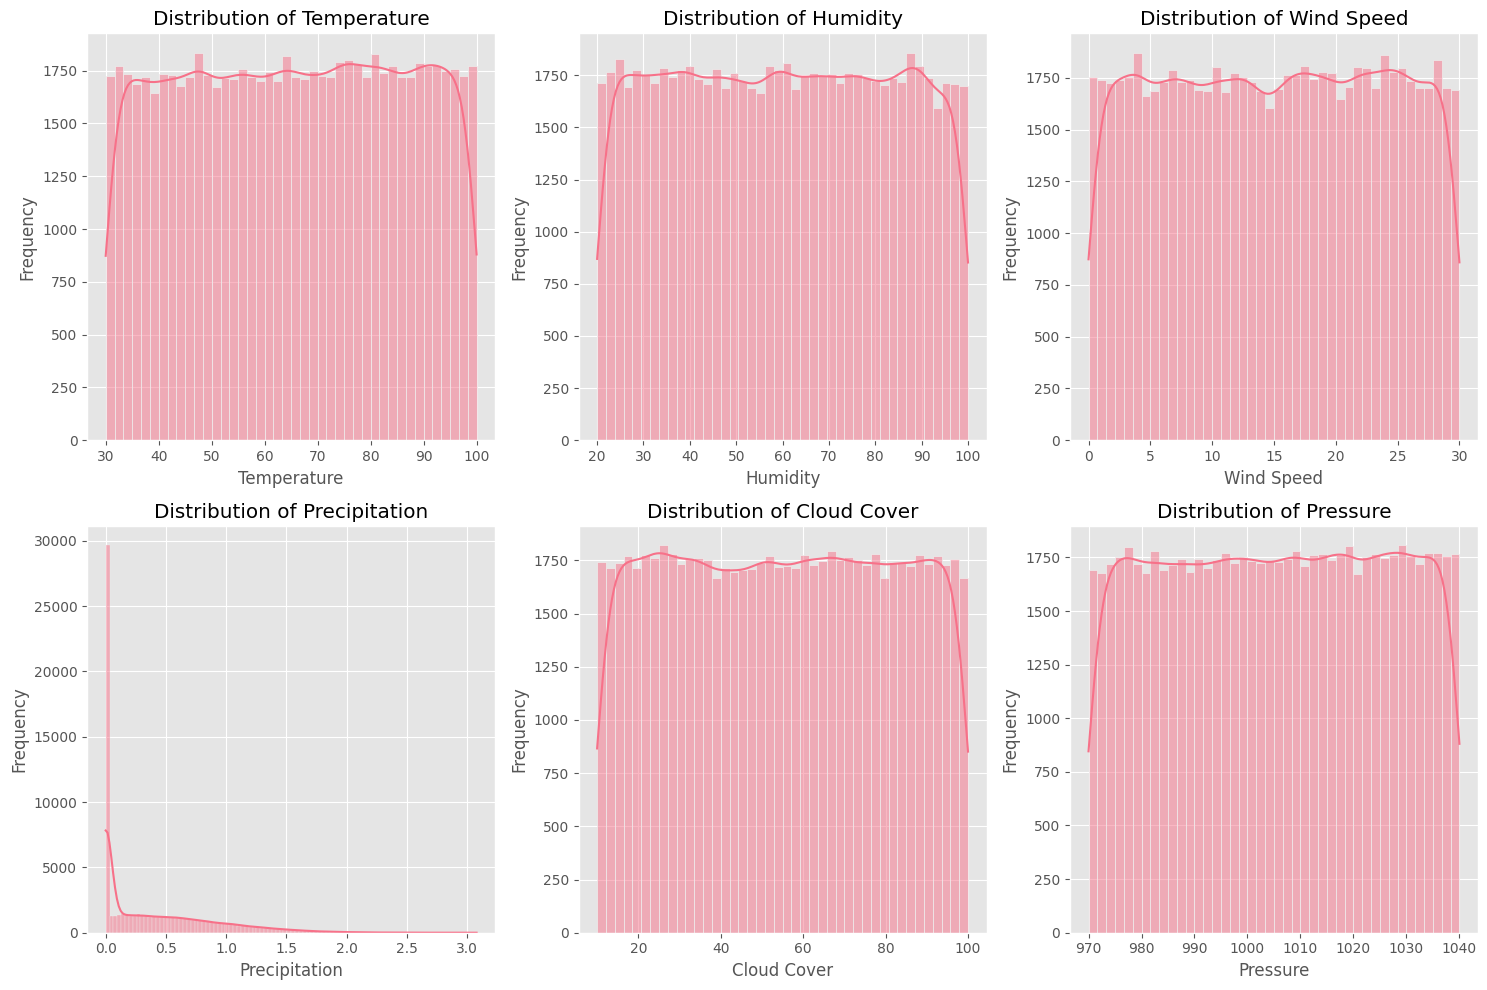

In [14]:
# Step 3: Exploratory Data Analysis (EDA)
# Setting up the figure for histograms
plt.figure(figsize=(15, 10))  # Set figure size for multiple subplots
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']  # Numerical features
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Create 2x3 grid
    sns.histplot(data=df, x=col, kde=True)  # Plot histogram with kernel density estimate
    plt.title(f'Distribution of {col}')  # Set title
    plt.xlabel(col)  # Label x-axis
    plt.ylabel('Frequency')  # Label y-axis
plt.tight_layout()  # Adjust layout to prevent overlap


In [15]:
hist_path = os.path.join(output_dir, 'feature_distributions.png')  # Define plot save path
try:
    plt.savefig(hist_path)  # Save histogram plot
    print(f"\nHistogram plot saved to '{hist_path}'")
except Exception as e:
    print(f"Error saving histogram plot: {str(e)}")
plt.close()  # Close plot to free memory


Histogram plot saved to 'rainfall_eda_plots2\feature_distributions.png'


Text(0, 0.5, 'Count')

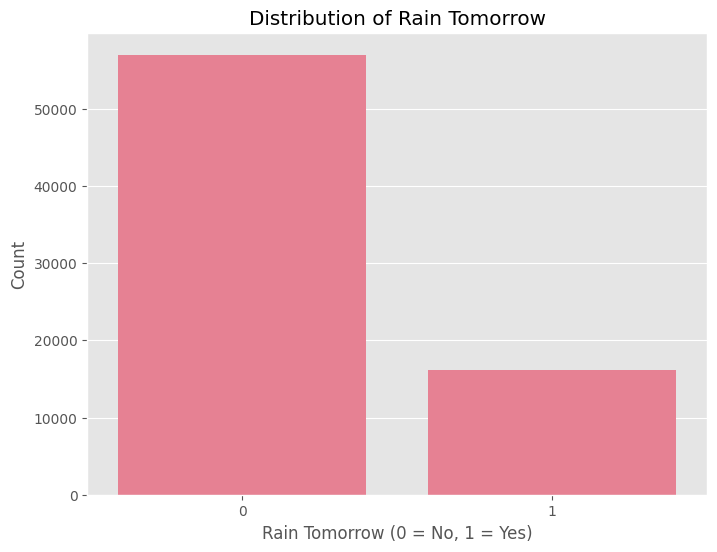

In [16]:
# Visualizing Rain Tomorrow distribution
plt.figure(figsize=(8, 6))  # Set figure size
sns.countplot(data=df, x='Rain Tomorrow')  # Count plot for Rain Tomorrow
plt.title('Distribution of Rain Tomorrow')  # Set title
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')  # Label x-axis
plt.ylabel('Count')  # Label y-axis

In [17]:
rain_dist_path = os.path.join(output_dir, 'rain_tomorrow_distribution.png')  # Define plot save path
try:
    plt.savefig(rain_dist_path)  # Save count plot
    print(f"Rain Tomorrow distribution plot saved to '{rain_dist_path}'")
except Exception as e:
    print(f"Error saving Rain Tomorrow distribution plot: {str(e)}")
plt.close()  # Close plot

Rain Tomorrow distribution plot saved to 'rainfall_eda_plots2\rain_tomorrow_distribution.png'


In [27]:
# Step 4: Temporal Analysis and Feature Relationships by Location (Enhanced - Sampled)
# Extracting month and year from Date for temporal analysis
df['Month'] = df['Date'].dt.month  # Extract month (1–12)
df['Year'] = df['Date'].dt.year    # Extract year (2024–2025)

# Sampling 50 random rows from the dataset for analysis
sample_df = df.sample(n=50, random_state=42)  # Random sample of 50 rows with fixed seed

# Grouping by Month and Location to analyze Rain Tomorrow distribution
monthly_rain = sample_df.groupby(['Month', 'Location', 'Rain Tomorrow']).size().unstack(fill_value=0)  # Count Rain Tomorrow
monthly_rain = monthly_rain.reset_index()  # Convert to DataFrame
monthly_rain.columns = ['Month', 'Location', 'No Rain', 'Rain']  # Rename columns
print("\nMonthly Rain Tomorrow Counts for Sampled Data:")  # Header
print(monthly_rain)  # Display counts


Monthly Rain Tomorrow Counts for Sampled Data:
    Month         Location  No Rain  Rain
0       1           Austin        0     1
1       1           Denver        1     1
2       1       Fort Worth        1     0
3       1         New York        1     0
4       1    San Francisco        1     0
5       1          Seattle        1     1
6       2          Houston        1     0
7       2         New York        1     0
8       2         San Jose        1     0
9       2  Washington D.C.        1     0
10      3        Charlotte        1     0
11      3     Jacksonville        1     0
12      3    San Francisco        1     0
13      4         Columbus        0     1
14      4     Indianapolis        1     0
15      5        Charlotte        1     0
16      5          Chicago        1     0
17      5     Philadelphia        0     1
18      5        San Diego        1     0
19      7         Columbus        1     0
20      7           Dallas        1     0
21      7       Fort Worth  


Monthly Rain Tomorrow Counts by Location:
     Month         Location  No Rain  Rain
0        1           Austin      250    60
1        1        Charlotte      232    78
2        1          Chicago      250    60
3        1         Columbus      225    85
4        1           Dallas      242    68
..     ...              ...      ...   ...
235     12        San Diego      237    73
236     12    San Francisco      241    69
237     12         San Jose      253    57
238     12          Seattle      245    65
239     12  Washington D.C.      243    67

[240 rows x 4 columns]


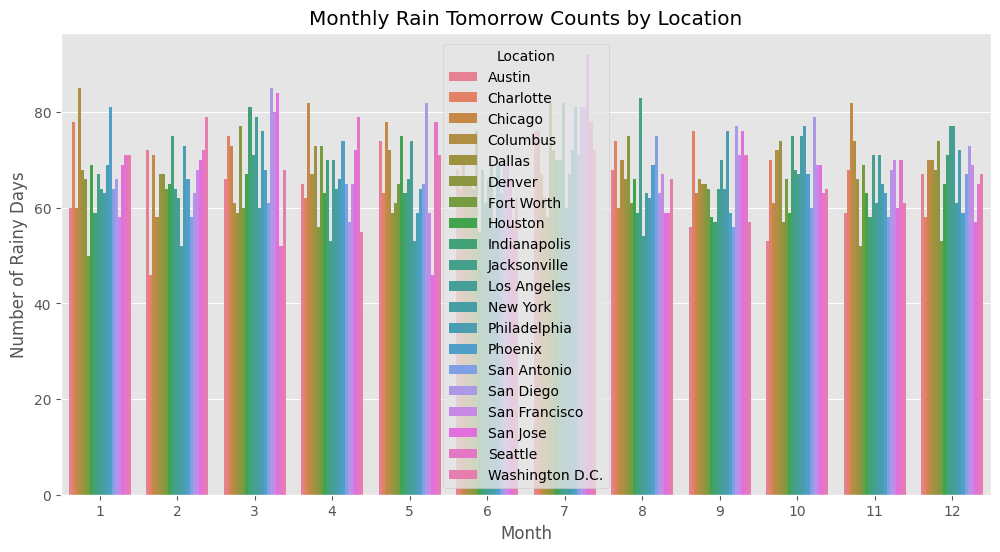

In [56]:
# Step 4: Temporal Analysis and Feature Relationships by Location
# Extracting month and year from Date for temporal analysis
df['Month'] = df['Date'].dt.month  # Extract month (1–12)
df['Year'] = df['Date'].dt.year    # Extract year (2024–2025)

# Grouping by Month and Location to analyze Rain Tomorrow distribution
monthly_rain = df.groupby(['Month', 'Location', 'Rain Tomorrow']).size().unstack(fill_value=0)  # Count Rain Tomorrow by month and location
monthly_rain = monthly_rain.reset_index()  # Convert to DataFrame for plotting
monthly_rain.columns = ['Month', 'Location', 'No Rain', 'Rain']  # Rename columns for clarity
print("\nMonthly Rain Tomorrow Counts by Location:")  # Header for clarity
print(monthly_rain)  # Display counts of Rain Tomorrow (0 and 1) by month and location
# Visualizing monthly Rain Tomorrow distribution by Location
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x='Month', y='Rain', hue='Location', data=monthly_rain)  # Bar plot for Rain counts
plt.title('Monthly Rain Tomorrow Counts by Location')  # Set title
plt.xlabel('Month')  # Label x-axis
plt.ylabel('Number of Rainy Days')  # Label y-axis
plt.legend(title='Location')  # Add legend


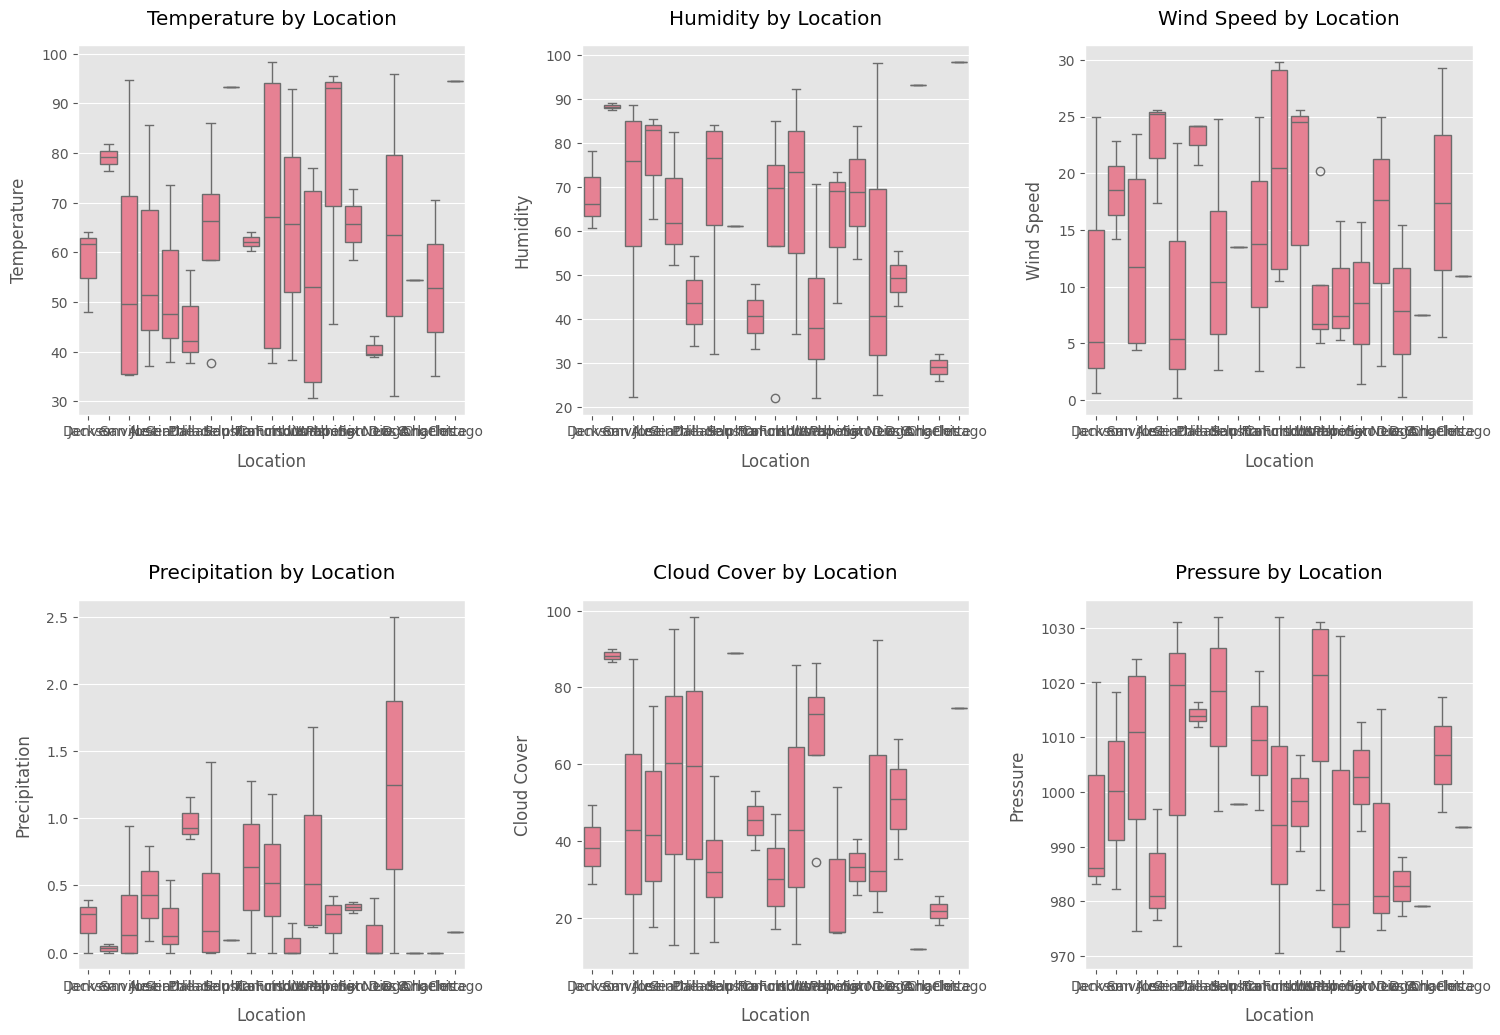

In [31]:
# Visualizing feature distributions by Location using boxplots
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']  # Numerical features
plt.figure(figsize=(18, 12))  # Increased figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # 2x3 grid for boxplots
    sns.boxplot(x='Location', y=col, data=sample_df)  # Plot boxplot
    plt.title(col + ' by Location', pad=15)  # Title with padding
    plt.xlabel('Location', labelpad=10)  # X-axis label
    plt.ylabel(col, labelpad=10)  # Y-axis label
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Increase spacing


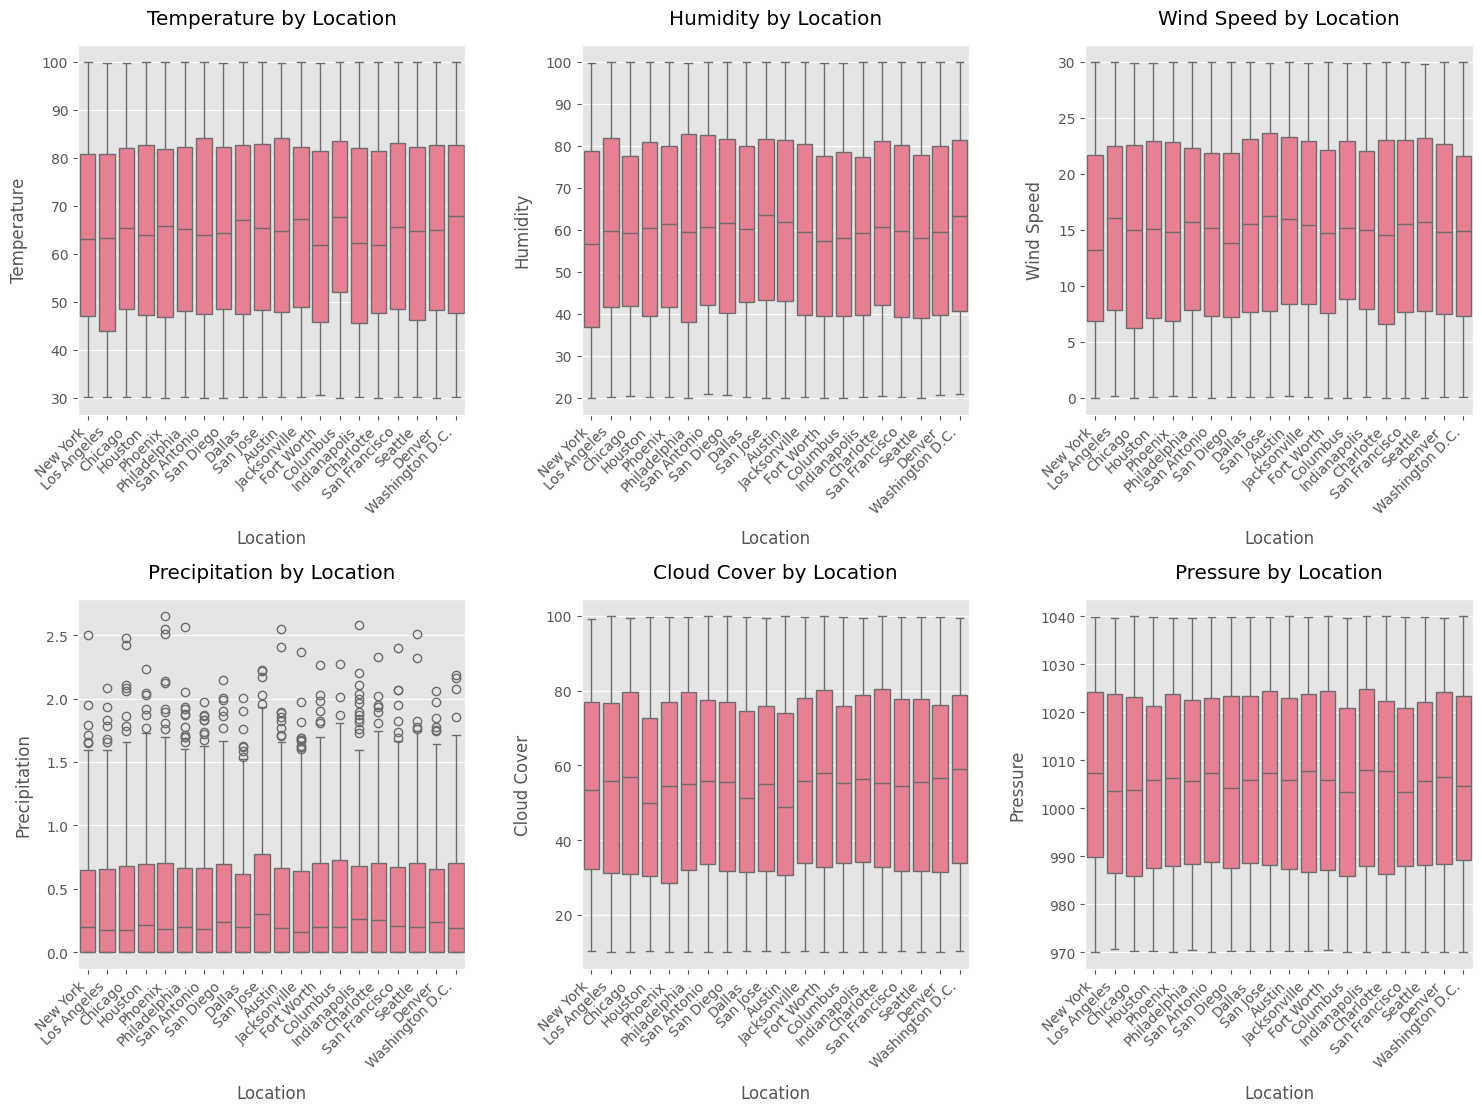

In [57]:
df['Month'] = df['Date'].dt.month  # Extract month (1–12)
df['Year'] = df['Date'].dt.year    # Extract year (2024–2025)

# Sampling data for the first 3 months (January–March 2024) per location
sample_df = df[df['Date'].dt.month.isin([1, 2, 3]) & (df['Date'].dt.year == 2024)]  # Filter for Jan–Mar 2024

numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']  # Numerical features
plt.figure(figsize=(18, 12))  # Increased figure size for clarity
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # 2x3 grid for boxplots
    sns.boxplot(x='Location', y=col, data=sample_df)  # Plot boxplot for sampled data
    plt.title(col + ' by Location', pad=15)  # Title with padding
    plt.xlabel('Location', labelpad=10)  # X-axis label
    plt.ylabel(col, labelpad=10)  # Y-axis label
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability (though only 2 locations)
plt.subplots_adjust(hspace=0.5, wspace=0.3)

In [54]:
# Computing detailed summary statistics for numerical columns
print("\nDetailed Summary Statistics for Numerical Columns:")  # Header for clarity
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']
print(df[numerical_cols].describe())  # Summary stats (count, mean, std, min, max, quartiles)

# Adding median and skewness for deeper insights
print("\nMedian Values for Numerical Columns:")  # Header for clarity
print(df[numerical_cols].median())  # Display median for each numerical column
print("\nSkewness of Numerical Columns:")  # Header for clarity
print(df[numerical_cols].skew())  # Display skewness to check distribution symmetry


Detailed Summary Statistics for Numerical Columns:
        Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  73100.000000  73100.000000  73100.000000   73100.000000  73100.000000   
mean      65.182270     59.875041     15.017946       0.390635     54.942807   
std       20.205793     23.066115      8.668729       0.474833     25.982487   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.678968     39.800732      7.485182       0.000000     32.318668   
50%       65.294949     59.887840     15.102495       0.196909     55.011121   
75%       82.636570     79.835990     22.551794       0.673177     77.412469   
max       99.997393     99.999025     29.999017       3.078090     99.998957   

           Pressure  
count  73100.000000  
mean    1005.176013  
std       20.203889  
min      970.000919  
25%      987.697646  
50%     1005.284188  
75%     1022.727410  
max     1039.999765  

Median Values for Numerical 

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

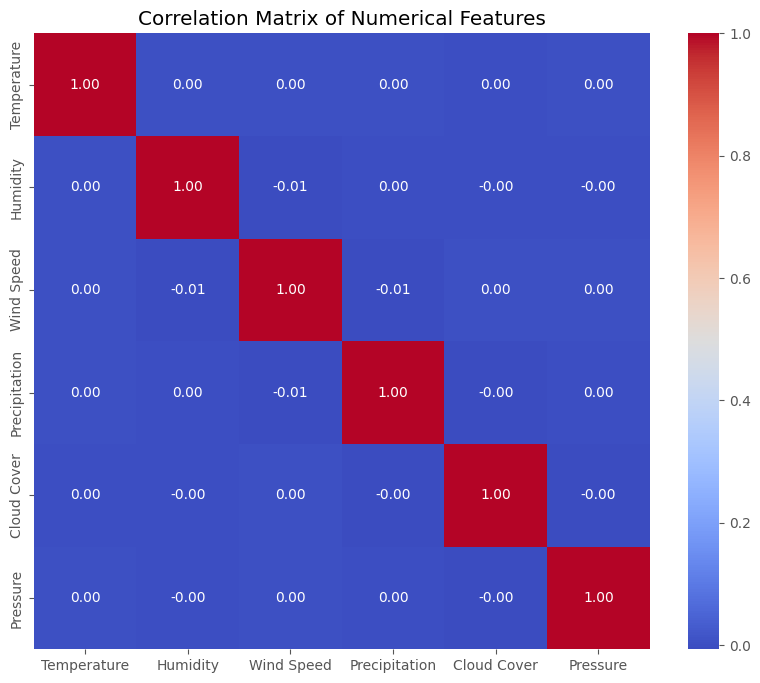

In [49]:
# Visualizing correlations between numerical features with a heatmap
plt.figure(figsize=(10, 8))  # Set figure size
correlation_matrix = df[numerical_cols].corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)  # Plot heatmap
plt.title('Correlation Matrix of Numerical Features')  # Set title

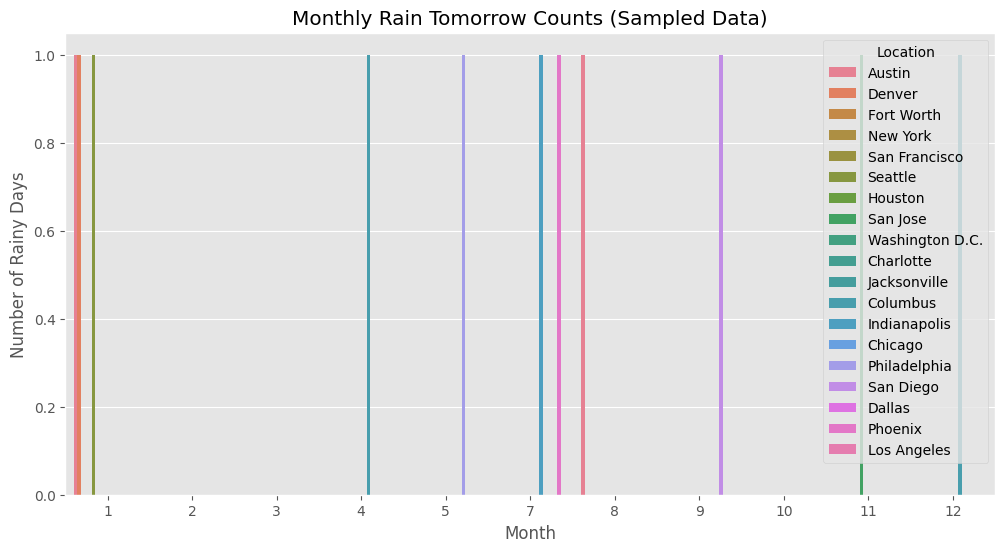

In [29]:
# Visualizing monthly Rain Tomorrow distribution by Location
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x='Month', y='Rain', hue='Location', data=monthly_rain)  # Bar plot for Rain counts
plt.title('Monthly Rain Tomorrow Counts (Sampled Data)')  # Set title
plt.xlabel('Month')  # Label x-axis
plt.ylabel('Number of Rainy Days')  # Label y-axis
plt.legend(title='Location')  # Add legend

In [30]:
monthly_rain_path = os.path.join(output_dir, 'monthly_rain_tomorrow_sampled.png')  # Save path
try:
    plt.savefig(monthly_rain_path)  # Save bar plot
    print(f"\nMonthly Rain Tomorrow plot saved to '{monthly_rain_path}'")
except Exception as e:
    print(f"Error saving monthly Rain Tomorrow plot: {str(e)}")
plt.close()  # Close plot


Monthly Rain Tomorrow plot saved to 'rainfall_eda_plots2\monthly_rain_tomorrow_sampled.png'


In [32]:
boxplot_path = os.path.join(output_dir, 'feature_boxplots_by_location_sampled.png')  # Save path
try:
    plt.savefig(boxplot_path, dpi=300, bbox_inches='tight')  # Save with high resolution
    print(f"Boxplot by Location saved to '{boxplot_path}'")
except Exception as e:
    print(f"Error saving boxplot: {str(e)}")
plt.close()  # Close plot

Boxplot by Location saved to 'rainfall_eda_plots2\feature_boxplots_by_location_sampled.png'


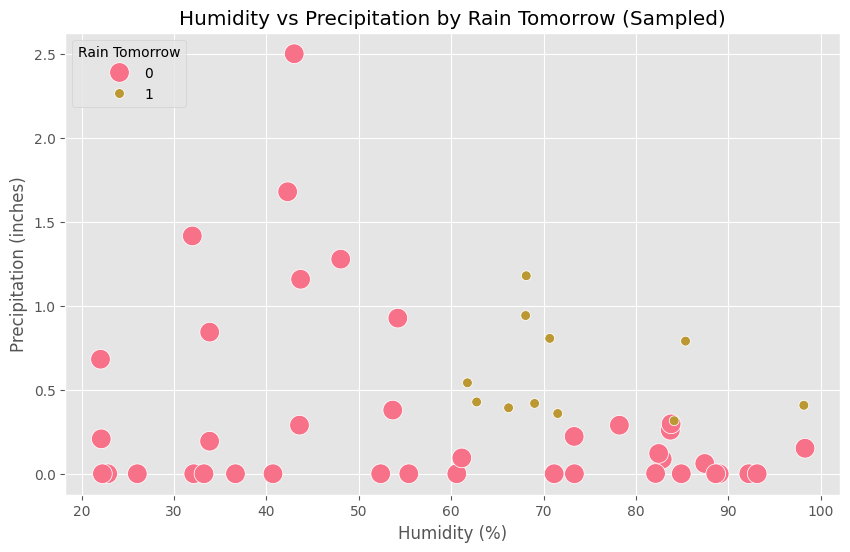

In [33]:
# New Visualization: Scatter plot of Humidity vs Precipitation by Rain Tomorrow
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(x='Humidity', y='Precipitation', hue='Rain Tomorrow', size='Rain Tomorrow', data=sample_df, sizes=(50, 200))  # Scatter plot
plt.title('Humidity vs Precipitation by Rain Tomorrow (Sampled)')  # Set title
plt.xlabel('Humidity (%)')  # Label x-axis
plt.ylabel('Precipitation (inches)')  # Label y-axis
plt.legend(title='Rain Tomorrow', loc='upper left')  # Add legend

In [34]:
scatter_path = os.path.join(output_dir, 'humidity_precipitation_scatter_sampled.png')  # Save path
try:
    plt.savefig(scatter_path, dpi=300, bbox_inches='tight')  # Save
    print(f"Scatter plot saved to '{scatter_path}'")
except Exception as e:
    print(f"Error saving scatter plot: {str(e)}")
plt.close()  # Close plot

Scatter plot saved to 'rainfall_eda_plots2\humidity_precipitation_scatter_sampled.png'


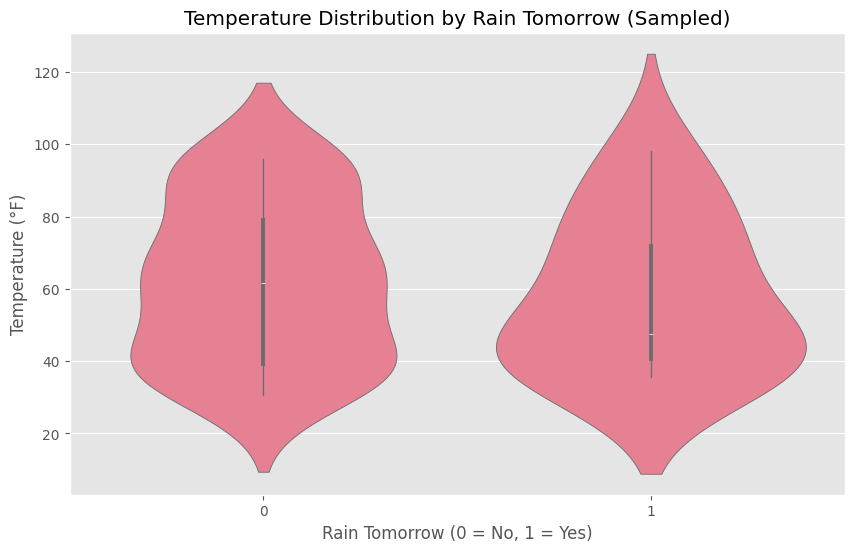

In [35]:
# New Visualization: Violin plot of Temperature by Rain Tomorrow
plt.figure(figsize=(10, 6))  # Set figure size
sns.violinplot(x='Rain Tomorrow', y='Temperature', data=sample_df)  # Violin plot
plt.title('Temperature Distribution by Rain Tomorrow (Sampled)')  # Set title
plt.xlabel('Rain Tomorrow (0 = No, 1 = Yes)')  # Label x-axis
plt.ylabel('Temperature (°F)')  # Label y-axis
violin_path = os.path.join(output_dir, 'temperature_violin_sampled.png')  # Save path

In [36]:
try:
    plt.savefig(violin_path, dpi=300, bbox_inches='tight')  # Save
    print(f"Violin plot saved to '{violin_path}'")
except Exception as e:
    print(f"Error saving violin plot: {str(e)}")
plt.close()  # Close plot

Violin plot saved to 'rainfall_eda_plots2\temperature_violin_sampled.png'


(array([19723., 19737., 19754., 19768., 19783., 19797., 19814.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19737.0, 0, '2024-01-15'),
  Text(19754.0, 0, '2024-02-01'),
  Text(19768.0, 0, '2024-02-15'),
  Text(19783.0, 0, '2024-03-01'),
  Text(19797.0, 0, '2024-03-15'),
  Text(19814.0, 0, '2024-04-01')])

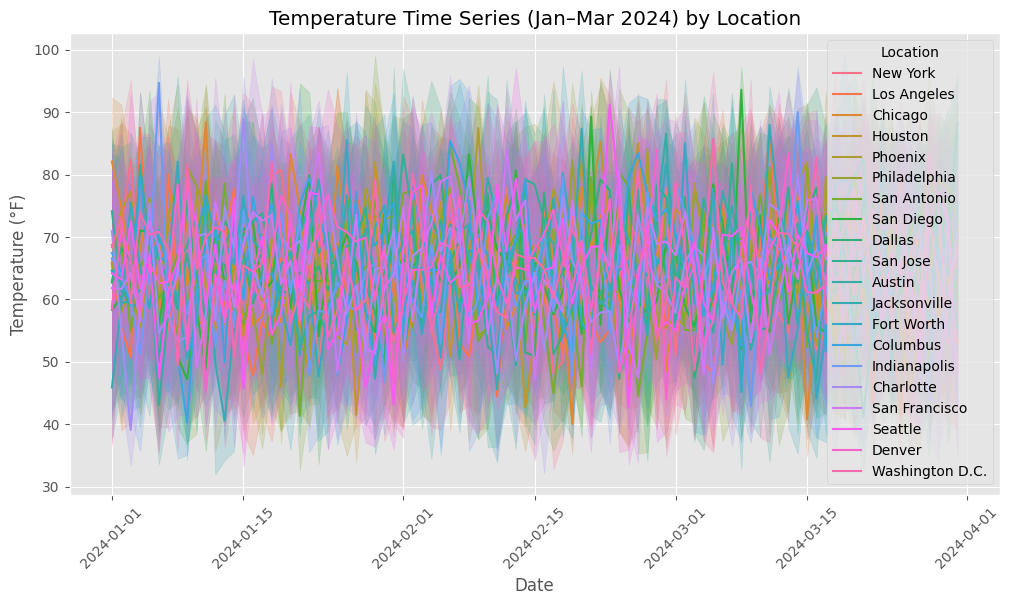

In [58]:
# New Visualization: Time series plot of Temperature by Location
plt.figure(figsize=(12, 6))  # Set figure size
sns.lineplot(x='Date', y='Temperature', hue='Location', data=sample_df)  # Time series
plt.title('Temperature Time Series (Jan–Mar 2024) by Location')  # Set title
plt.xlabel('Date')  # Label x-axis
plt.ylabel('Temperature (°F)')  # Label y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

(array([19723., 19814., 19905., 19997., 20089., 20179., 20270., 20362.,
        20454.]),
 [Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10'),
  Text(20089.0, 0, '2025-01'),
  Text(20179.0, 0, '2025-04'),
  Text(20270.0, 0, '2025-07'),
  Text(20362.0, 0, '2025-10'),
  Text(20454.0, 0, '2026-01')])

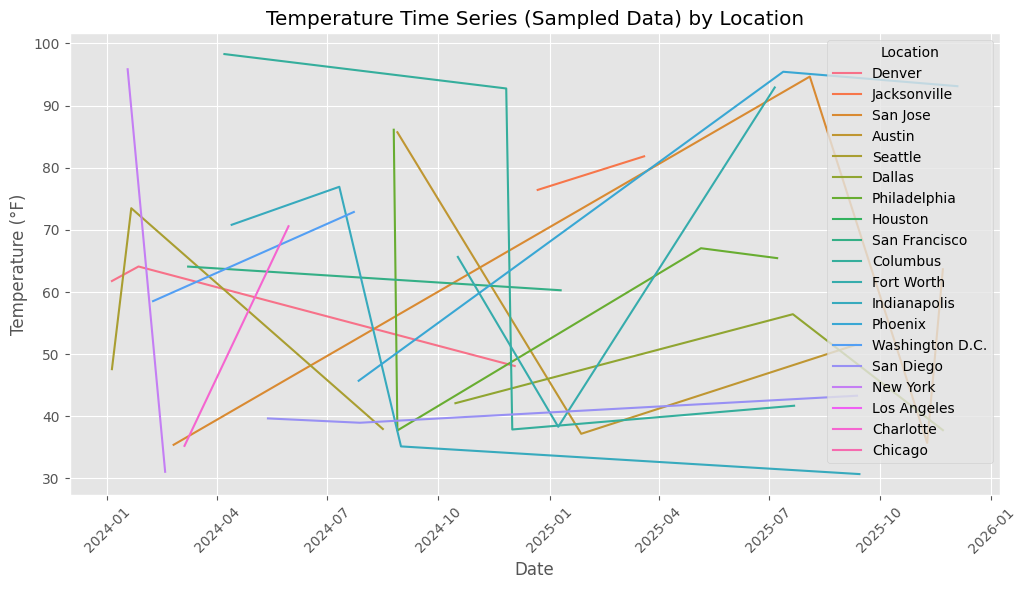

In [60]:
# New Visualization: Time series plot of Temperature by Location
sample_df = df.sample(n=50, random_state=42)
plt.figure(figsize=(12, 6))  # Set figure size
sns.lineplot(x='Date', y='Temperature', hue='Location', data=sample_df)  # Time series
plt.title('Temperature Time Series (Sampled Data) by Location')  # Set title
plt.xlabel('Date')  # Label x-axis
plt.ylabel('Temperature (°F)')  # Label y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

In [38]:
timeseries_path = os.path.join(output_dir, 'temperature_timeseries_sampled.png')  # Save path
try:
    plt.savefig(timeseries_path, dpi=300, bbox_inches='tight')  # Save
    print(f"Time series plot saved to '{timeseries_path}'")
except Exception as e:
    print(f"Error saving time series plot: {str(e)}")
plt.close()  # Close plot

Time series plot saved to 'rainfall_eda_plots2\temperature_timeseries_sampled.png'


In [39]:
# Objective Analysis: Statistical comparison of Temperature means by Location
ny_temp = sample_df[sample_df['Location'] == 'New York']['Temperature']
dc_temp = sample_df[sample_df['Location'] == 'Washington D.C.']['Temperature']
t_stat, p_value = stats.ttest_ind(ny_temp.dropna(), dc_temp.dropna())  # T-test
print("\nStatistical Test: T-test for Temperature Means by Location (Sampled)")  # Header
print(f"T-statistic: {t_stat:.4f}")  # Display t-statistic
print(f"P-value: {p_value:.4f}")  # Display p-value
if p_value < 0.05:
    print("Conclusion: Significant difference in Temperature means between locations (p < 0.05)")
else:
    print("Conclusion: No significant difference in Temperature means between locations (p >= 0.05)")


Statistical Test: T-test for Temperature Means by Location (Sampled)
T-statistic: -0.0677
P-value: 0.9522
Conclusion: No significant difference in Temperature means between locations (p >= 0.05)


In [40]:
# Objective Analysis: Correlation matrix by Location
ny_df = sample_df[sample_df['Location'] == 'New York']
dc_df = sample_df[sample_df['Location'] == 'Washington D.C.']
ny_corr = ny_df[numerical_cols].corr().round(2)
dc_corr = dc_df[numerical_cols].corr().round(2)
print("\nCorrelation Matrix for New York (Sampled):")  # Header
print(ny_corr)
print("\nCorrelation Matrix for Washington D.C. (Sampled):")  # Header
print(dc_corr)


Correlation Matrix for New York (Sampled):
               Temperature  Humidity  Wind Speed  Precipitation  Cloud Cover  \
Temperature            1.0       1.0         1.0           -1.0         -1.0   
Humidity               1.0       1.0         1.0           -1.0         -1.0   
Wind Speed             1.0       1.0         1.0           -1.0         -1.0   
Precipitation         -1.0      -1.0        -1.0            1.0          1.0   
Cloud Cover           -1.0      -1.0        -1.0            1.0          1.0   
Pressure              -1.0      -1.0        -1.0            1.0          1.0   

               Pressure  
Temperature        -1.0  
Humidity           -1.0  
Wind Speed         -1.0  
Precipitation       1.0  
Cloud Cover         1.0  
Pressure            1.0  

Correlation Matrix for Washington D.C. (Sampled):
               Temperature  Humidity  Wind Speed  Precipitation  Cloud Cover  \
Temperature            1.0      -1.0         1.0            1.0          1.0   
Hu

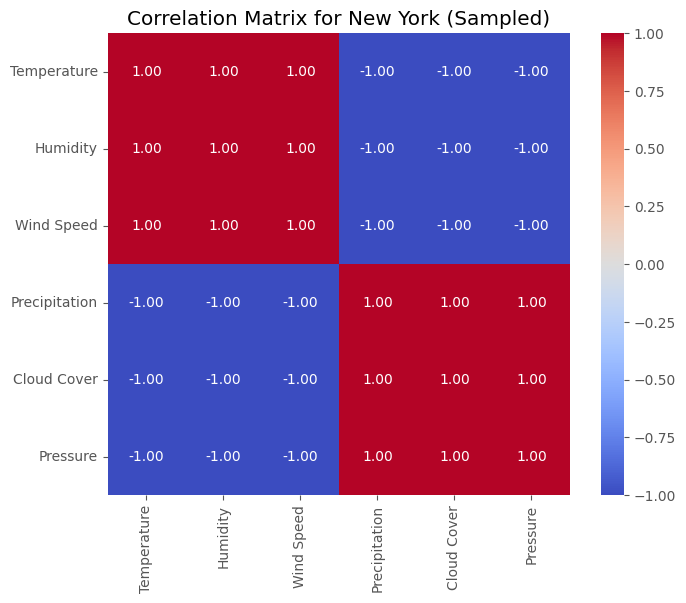

In [41]:
# New Visualization: Heatmap for New York Correlation Matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(ny_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)  # Heatmap
plt.title('Correlation Matrix for New York (Sampled)')  # Set title
ny_heatmap_path = os.path.join(output_dir, 'ny_correlation_heatmap_sampled.png')  # Save path

In [42]:
ny_heatmap_path = os.path.join(output_dir, 'ny_correlation_heatmap_sampled.png')  # Save path
try:
    plt.savefig(ny_heatmap_path, dpi=300, bbox_inches='tight')  # Save
    print(f"New York correlation heatmap saved to '{ny_heatmap_path}'")
except Exception as e:
    print(f"Error saving New York correlation heatmap: {str(e)}")
plt.close()  # Close plot

New York correlation heatmap saved to 'rainfall_eda_plots2\ny_correlation_heatmap_sampled.png'


Text(0.5, 1.0, 'Correlation Matrix for Washington D.C. (Sampled)')

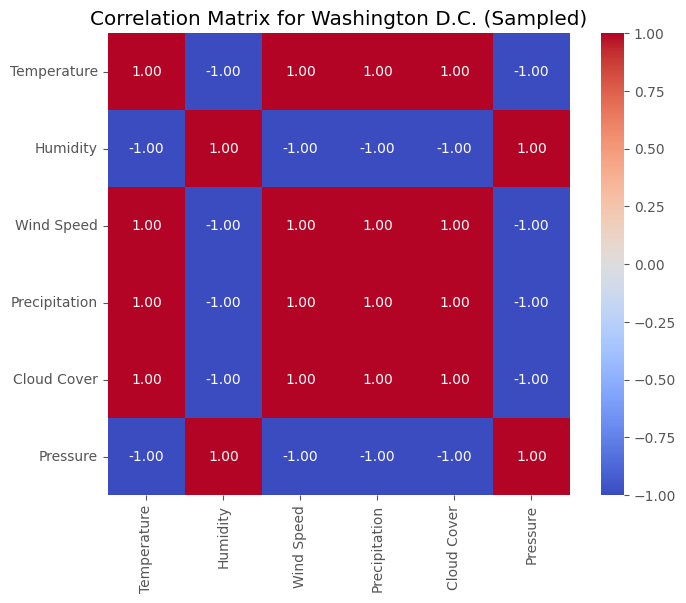

In [44]:
# New Visualization: Heatmap for Washington D.C. Correlation Matrix
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(dc_corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)  # Heatmap
plt.title('Correlation Matrix for Washington D.C. (Sampled)')  # Set title


In [45]:
dc_heatmap_path = os.path.join(output_dir, 'dc_correlation_heatmap_sampled.png')  # Save path
try:
    plt.savefig(dc_heatmap_path, dpi=300, bbox_inches='tight')  # Save
    print(f"Washington D.C. correlation heatmap saved to '{dc_heatmap_path}'")
except Exception as e:
    print(f"Error saving Washington D.C. correlation heatmap: {str(e)}")
plt.close()  # Close plot

Washington D.C. correlation heatmap saved to 'rainfall_eda_plots2\dc_correlation_heatmap_sampled.png'


In [61]:
# Saving enhanced results
sample_df.to_csv(os.path.join(output_dir, 'rain_prediction_sampled_with_month_year.csv'), index=False)  # Save updated sample
print(f"Sampled dataset saved to '{os.path.join(output_dir, 'rain_prediction_sampled_with_month_year.csv')}'")

Sampled dataset saved to 'rainfall_eda_plots2\rain_prediction_sampled_with_month_year.csv'


In [63]:
#Step-5
# Importing all required libraries upfront (as per your style)
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For plotting visualizations
import seaborn as sns  # For enhanced visualizations
import os  # For handling file operations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.ensemble import RandomForestClassifier  # For feature importance
from sklearn.linear_model import LogisticRegression  # For baseline model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation

In [65]:
# Setting up plotting style for professional visualizations
plt.style.use('ggplot')  # Using ggplot style as a valid alternative for clean plots
sns.set_palette('husl')  # Setting a visually appealing color palette

In [67]:
# Define output directory globally
output_dir = 'rainfall_eda_plots2'  # Define output directory name

# Ensuring output directory exists for saving plots and results
try:
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Create directory if it doesn't exist
        print(f"Created directory: {output_dir}")  # Confirm directory creation
    else:
        print(f"Directory already exists: {output_dir}")  # Confirm directory exists
except PermissionError:
    print(f"Error: No permission to create directory '{output_dir}'. Please check your write permissions.")
    raise  # Stop execution if permission issue occurs
except Exception as e:
    print(f"Error creating directory '{output_dir}': {str(e)}")
    raise  # Stop execution for other errors

Directory already exists: rainfall_eda_plots2


In [75]:
# Loading the sampled dataset with Month and Year
df = pd.read_csv('rainfall_eda_plots2/rain_prediction_sampled_with_month_year.csv')  # Load sampled CSV
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is datetime

In [73]:
# Step 5: Feature Importance and Preliminary Modeling
# Preparing data for modeling
# Encoding categorical variable 'Location' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)  # Encode Location (e.g., Location_Washington D.C.)
features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Month', 'Year', 'Location_Washington D.C.']  # Feature list
X = df_encoded[features]  # Feature matrix
y = df_encoded['Rain Tomorrow']  # Target variable

In [74]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split with fixed seed

In [76]:
# Assessing feature importance using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize Random Forest
rf_model.fit(X_train, y_train)  # Train model
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})  # Extract importance
feature_importance = feature_importance.sort_values('Importance', ascending=False)  # Sort by importance
print("\nFeature Importance (Random Forest) for Sampled Data:")  # Header for clarity
print(feature_importance)  # Display importance scores


Feature Importance (Random Forest) for Sampled Data:
                    Feature  Importance
3             Precipitation    0.329228
1                  Humidity    0.229242
5                  Pressure    0.128325
2                Wind Speed    0.101860
0               Temperature    0.071715
4               Cloud Cover    0.070753
6                     Month    0.042576
7                      Year    0.018874
8  Location_Washington D.C.    0.007426
